In [119]:
import tensorflow as tf
import numpy as np
import PIL
import pandas as pd
import matplotlib.pyplot as plt
from random import randrange

In [132]:
train_data = pd.read_csv("./data/emnist-balanced-train.csv")
test_data = pd.read_csv("./data/emnist-balanced-test.csv")

mappings = []
with open("./data/emnist-balanced-mapping.txt", 'r') as f:
    lines = f.readlines()
    for line in lines:
        m = line.replace("\n", "").replace("\r", "").split(" ")
        mappings.append(m)

def letterString(i):
    return "{}, '{}'".format(i, chr(int(mappings[i][1])))

input_image_width = input_image_height = 28
number_of_classes = len(mappings)
print("{} classes {}x{}px".format(number_of_classes, input_image_width, input_image_height))

47 classes 28x28px


In [133]:
y_train = np.array(train_data.iloc[:,0].values)
x_train = np.array(train_data.iloc[:,1:].values) / 255.0

y_test = np.array(test_data.iloc[:,0].values)
x_test = np.array(test_data.iloc[:,1:].values) / 255.0

x_train = x_train.reshape(x_train.shape[0], input_image_width, input_image_height, 1)
x_test = x_test.reshape(x_test.shape[0], input_image_width, input_image_height, 1)

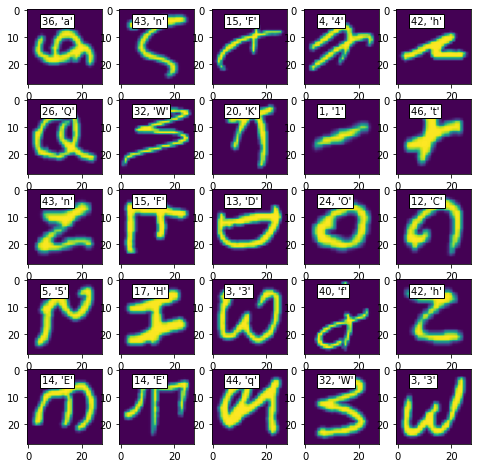

In [134]:
fig, axes = plt.subplots(5, 5, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.text(5, 5, letterString(y_train[i]), bbox={'facecolor': 'white', 'pad': 2})

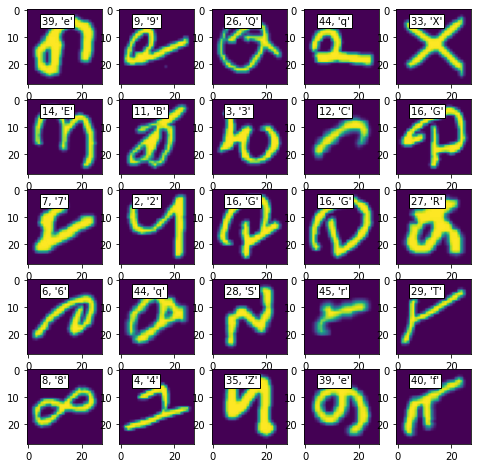

In [136]:
fig, axes = plt.subplots(5, 5, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i])
    ax.text(5, 5, letterString(y_test[i]), bbox={'facecolor': 'white', 'pad': 2})

Dense(512) tar längre tid än 256 och ger jämförbara resultat
adam (~85%) ger bättre resultat än rmsprop (~80%)

In [204]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(number_of_classes, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

fit_history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
3525/3525 [==============================] - 9s 2ms/step - loss: 0.8250 - accuracy: 0.7409
Epoch 2/20
3525/3525 [==============================] - 8s 2ms/step - loss: 0.5077 - accuracy: 0.8257
Epoch 3/20
3525/3525 [==============================] - 9s 3ms/step - loss: 0.4339 - accuracy: 0.8471
Epoch 4/20
3525/3525 [==============================] - 9s 3ms/step - loss: 0.3893 - accuracy: 0.8589
Epoch 5/20
3525/3525 [==============================] - 9s 2ms/step - loss: 0.3552 - accuracy: 0.8694
Epoch 6/20
3525/3525 [==============================] - 8s 2ms/step - loss: 0.3305 - accuracy: 0.8770
Epoch 7/20
3525/3525 [==============================] - 8s 2ms/step - loss: 0.3108 - accuracy: 0.8830
Epoch 8/20
3525/3525 [==============================] - 8s 2ms/step - loss: 0.2923 - accuracy: 0.8878
Epoch 9/20
3525/3525 [==============================] - 8s 2ms/step - loss: 0.2813 - accuracy: 0.8927
Epoch 10/20
3525/3525 [==============================] - 8s 2ms/step - loss: 0.270

Text(0, 0.5, 'Accuracy')

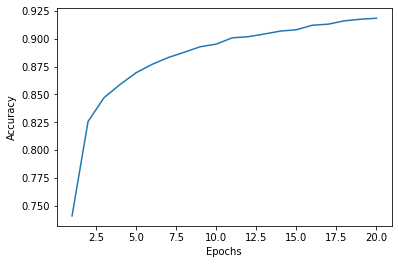

In [205]:
plt.plot(
    range(1, len(fit_history.history['accuracy']) + 1), 
    fit_history.history['accuracy'], label='Accuracy'
)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [206]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print("Loss: {:.2f}\nAccuracy: {:.2f}%".format(val_loss, val_acc*100.0))

588/588 [==============================] - 1s 1ms/step - loss: 0.7951 - accuracy: 0.8397
Loss: 0.80
Accuracy: 83.97%


In [ ]:
#Testing with own images
img = tf.keras.utils.load_img(
    "./data/images/imgH.png", target_size=(28, 28), color_mode = "grayscale"
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
img_array = img_array / 255.0

plt.imshow(img_array[0])

Guessing 31, 'V' with a 5.58% confidence.
Correct!


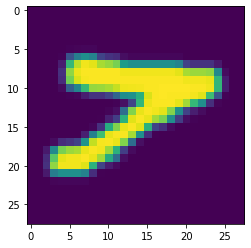

In [207]:
testi = randrange(len(x_test))

predictions = model.predict(x_test)
score = tf.nn.softmax(predictions[testi])
guess = np.argmax(score)

plt.imshow(x_test[testi])

print(
    "Guessing {} with a {:.2f}% confidence."
    .format(letterString(guess), 100 * np.max(score))
)

if guess == y_test[testi]:
    print("Correct!")
else:
    print("Incorrect!")